In [2]:
#  Importing Libraries:
import pandas as pd
import numpy as np 

import matplotlib
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white",color_codes=True)

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
#  The ABove Library is imported to Avoid the error Messages : 

In [3]:
df_train = pd.read_csv("Demo_Datasets\Lesson 4/train.csv")

In [4]:
df_train.shape

(891, 12)

In [5]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# Drop Cabin 
# Age is relevent predictor for Survival : so we must keep it :
# Dropping Irrelevent columns from the Dataset:
df_train=df_train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [13]:
df_train.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [23]:
def age_approx(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [24]:
df_train.groupby(['Pclass']).mean()

Survived        Age     SibSp     Parch       Fare
Pclass                                                    
1       0.629630  38.233441  0.416667  0.356481  84.154687
2       0.472826  29.877630  0.402174  0.380435  20.662183
3       0.242363  25.140620  0.615071  0.393075  13.675550

In [25]:
df_train['Age']= df_train[['Age','Pclass']].apply(age_approx, axis=1)

In [26]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [27]:
df_train.dropna(inplace=True)
df_train.isnull()

Survived  Pclass    Sex    Age  SibSp  Parch   Fare  Embarked
0       False   False  False  False  False  False  False     False
1       False   False  False  False  False  False  False     False
2       False   False  False  False  False  False  False     False
3       False   False  False  False  False  False  False     False
4       False   False  False  False  False  False  False     False
..        ...     ...    ...    ...    ...    ...    ...       ...
886     False   False  False  False  False  False  False     False
887     False   False  False  False  False  False  False     False
888     False   False  False  False  False  False  False     False
889     False   False  False  False  False  False  False     False
890     False   False  False  False  False  False  False     False

[889 rows x 8 columns]

In [28]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [30]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [40]:
# Converting the Data Types into Categorical TO integers:
df_train_dummied = pd.get_dummies(df_train,columns=['Sex'])

In [41]:
df_train_dummied = pd.get_dummies(df_train_dummied,columns=["Embarked"])

In [42]:
df_train_dummied.head()

Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0         0       3  22.0      1      0   7.2500           0         1   
1         1       1  38.0      1      0  71.2833           1         0   
2         1       3  26.0      0      0   7.9250           1         0   
3         1       1  35.0      1      0  53.1000           1         0   
4         0       3  35.0      0      0   8.0500           0         1   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           0           1  
1           1           0           0  
2           0           0           1  
3           0           0           1  
4           0           0           1

<AxesSubplot:>

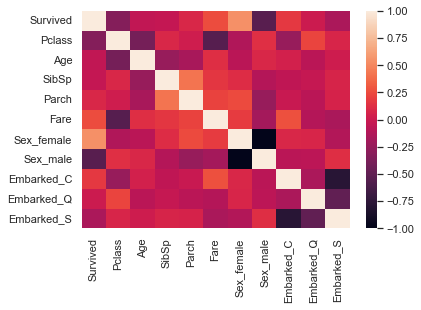

In [43]:
plt.figure(figsize=(6,4))
sns.heatmap(df_train_dummied.corr())

In [45]:
used_feature= ["Pclass","Age","SibSp","Parch","Sex_female","Sex_male","Embarked_C","Embarked_Q","Embarked_S"]

X = df_train_dummied[used_feature].values
y = df_train_dummied['Survived']

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 9)
(267, 9)
(622,)
(267,)


In [56]:
LogReg = LogisticRegression()

In [57]:
LogReg.fit(X_train,y_train)

C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
y_pred = LogReg.predict(X_test)

In [59]:
metrics.confusion_matrix(y_test,y_pred)

array([[143,  23],
       [ 22,  79]], dtype=int64)

In [61]:
metrics.accuracy_score(y_test,y_pred)

0.8314606741573034

In [62]:
len(X_test)

267

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       166
           1       0.77      0.78      0.78       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



In [64]:
LogReg.coef_

array([[-1.04314192, -0.03993457, -0.24324446, -0.04008103,  1.19387943,
        -1.19533661,  0.34944138, -0.03635018, -0.31454837]])

In [65]:
LogReg.intercept_

array([3.66253934])

In [66]:
df_train_dummied[used_feature].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [68]:
LogReg.predict_proba(X_test)

array([[0.26542844, 0.73457156],
       [0.39680939, 0.60319061],
       [0.94753068, 0.05246932],
       [0.25890075, 0.74109925],
       [0.94439334, 0.05560666],
       [0.1349627 , 0.8650373 ],
       [0.33322773, 0.66677227],
       [0.51998322, 0.48001678],
       [0.78159657, 0.21840343],
       [0.40753961, 0.59246039],
       [0.74018959, 0.25981041],
       [0.21122934, 0.78877066],
       [0.74870771, 0.25129229],
       [0.1456321 , 0.8543679 ],
       [0.86475191, 0.13524809],
       [0.36961142, 0.63038858],
       [0.89376644, 0.10623356],
       [0.29771474, 0.70228526],
       [0.1762542 , 0.8237458 ],
       [0.39841112, 0.60158888],
       [0.90505325, 0.09494675],
       [0.55279381, 0.44720619],
       [0.86461079, 0.13538921],
       [0.93775649, 0.06224351],
       [0.51586664, 0.48413336],
       [0.51627783, 0.48372217],
       [0.03900465, 0.96099535],
       [0.86935484, 0.13064516],
       [0.89829714, 0.10170286],
       [0.32470924, 0.67529076],
       [0.